In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/housesalesprediction/kc_house_data.csv


In [12]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [13]:
data = pd.read_csv('/kaggle/input/housesalesprediction/kc_house_data.csv'
                )
features = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
        'sqft_living15', 'sqft_lot15','price']

In [14]:
df = data[features]

In [15]:
df = df[df['bedrooms'] <= 11]

In [16]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Chuyển kiểu dữ liệu các cột sang float
cols_to_convert = ['sqft_living',
           'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']
df[cols_to_convert] = df[cols_to_convert].astype(float)


# Khởi tạo đối tượng StandardScaler
scaler = StandardScaler()


df.loc[:, ['sqft_living',
           'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']] = scaler.fit_transform(df[['sqft_living',
           'sqft_lot','sqft_above', 'sqft_basement','sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']])

In [17]:
features1 = ['bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement',
        'sqft_living15', 'sqft_lot15', 'yr_built', 'yr_renovated']
X = df[features1]
y = df['price']

print(X)
print(y)

       bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0             3       1.00    -0.979841 -0.228326     1.0           0     0   
1             3       2.25     0.533602 -0.189891     2.0           0     0   
2             2       1.00    -1.426252 -0.123306     1.0           0     0   
3             4       3.00    -0.130571 -0.244019     1.0           0     0   
4             3       2.00    -0.435437 -0.169660     1.0           0     0   
...         ...        ...          ...       ...     ...         ...   ...   
21608         3       2.50    -0.598758 -0.337427     3.0           0     0   
21609         4       2.50     0.250512 -0.224391     2.0           0     0   
21610         2       0.75    -1.154050 -0.332140     2.0           0     0   
21611         3       2.50    -0.522542 -0.307080     2.0           0     0   
21612         2       0.75    -1.154050 -0.338755     2.0           0     0   

       condition  grade  sqft_above  sqft_basement 

In [18]:
from sklearn.model_selection import train_test_split
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y, test_size = 0.15, random_state = 0)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid,y_train_valid,train_size=0.88, random_state=0)

In [19]:
from sklearn.linear_model import LassoCV
alphas = np.logspace(-4, 2, 10000)
lasso_cv = LassoCV(alphas = alphas, cv=10, max_iter=5000)
lasso_cv.fit(X_train, y_train)
print("Best alpha:", lasso_cv.alpha_)


Best alpha: 58.58369737125164


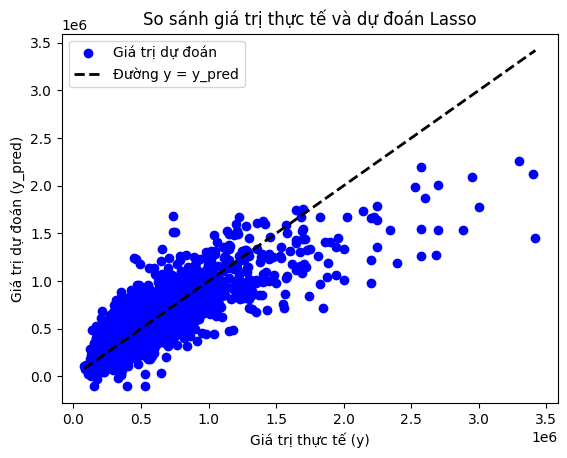

R-square: 0.65068708


In [20]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha = 58.58369737125164, max_iter=10000)
lasso.fit(X_train,y_train)
lasso_preds = lasso.predict(X_test)
# Vẽ biểu đồ phân tán giữa y thực tế và y dự đoán
plt.scatter(y_test, lasso_preds, color='blue', label='Giá trị dự đoán')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Đường y = y_pred')

# Thêm tiêu đề và nhãn
plt.title("So sánh giá trị thực tế và dự đoán Lasso")
plt.xlabel("Giá trị thực tế (y)")
plt.ylabel("Giá trị dự đoán (y_pred)")
plt.legend()

# Hiển thị biểu đồ
plt.show()

# In kết quả R-square
print(f"R-square: {lasso.score(X_train, y_train):.8f}")

In [22]:
# Dự đoán trên tập huấn luyện và tập xác thực
y_train_preds = lasso.predict(X_train)
y_valid_preds = lasso.predict(X_valid)

# Đánh giá trên tập huấn luyện
train_mse = mean_squared_error(y_train, y_train_preds)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train, y_train_preds)
train_r2 = r2_score(y_train, y_train_preds)

print("Tập Huấn Luyện:")
print(f"Mean Squared Error (MSE): {train_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"R-squared (R²): {train_r2:.4f}")

# Đánh giá trên tập xác thực
valid_mse = mean_squared_error(y_valid, y_valid_preds)
valid_rmse = np.sqrt(valid_mse)
valid_mae = mean_absolute_error(y_valid, y_valid_preds)
valid_r2 = r2_score(y_valid, y_valid_preds)

print("\nTập Xác Thực:")
print(f"Mean Squared Error (MSE): {valid_mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {valid_rmse:.2f}")
print(f"Mean Absolute Error (MAE): {valid_mae:.2f}")
print(f"R-squared (R²): {valid_r2:.4f}")


Tập Huấn Luyện:
Mean Squared Error (MSE): 49280671873.31
Root Mean Squared Error (RMSE): 221992.50
Mean Absolute Error (MAE): 142327.24
R-squared (R²): 0.6507

Tập Xác Thực:
Mean Squared Error (MSE): 40135531987.44
Root Mean Squared Error (RMSE): 200338.54
Mean Absolute Error (MAE): 137204.16
R-squared (R²): 0.6686


In [23]:
# Import thư viện time để đo thời gian
import time

# Đo thời gian huấn luyện mô hình
start_time = time.time()
lasso.fit(X_train, y_train)
train_time = time.time() - start_time
print(f"Thời gian huấn luyện: {train_time:.6f} giây")

# Đo thời gian dự đoán
start_time = time.time()
y_valid_preds = lasso.predict(X_valid)
predict_time = time.time() - start_time
print(f"Thời gian dự đoán: {predict_time:.6f} giây")


Thời gian huấn luyện: 0.188152 giây
Thời gian dự đoán: 0.009353 giây


In [24]:
X_test_noisy = X_test + np.random.normal(0, 0.01, X_test.shape)

noisy_predictions = lasso.predict(X_test_noisy)

noisy_mse = mean_squared_error(y_test, noisy_predictions)
noisy_mae = mean_absolute_error(y_test, noisy_predictions)
noisy_r2 = r2_score(y_test, noisy_predictions)

print("\nHiệu suất với dữ liệu có nhiễu:")
print(f"MSE với nhiễu: {noisy_mse:.2f}")
print(f"MAE với nhiễu: {noisy_mae:.2f}")
print(f"R-squared với nhiễu: {noisy_r2:.4f}")



Hiệu suất với dữ liệu có nhiễu:
MSE với nhiễu: 37859865881.39
MAE với nhiễu: 134430.61
R-squared với nhiễu: 0.6637


In [25]:
sample_size = [5000, 10000, 15000, 20000]
for size in sample_size:
    X_sample = X_train[:size]
    y_sample = y_train[:size]

    start_time = time.time()
    lasso.fit(X_sample, y_sample)
    train_time = time.time() - start_time
    print(f"Thời gian huấn luyện với mẫu {size}: {train_time:.4f} giây")

Thời gian huấn luyện với mẫu 5000: 0.0929 giây
Thời gian huấn luyện với mẫu 10000: 0.1626 giây
Thời gian huấn luyện với mẫu 15000: 0.1868 giây
Thời gian huấn luyện với mẫu 20000: 0.1846 giây


In [26]:
num_params = len(lasso.coef_) + 1  # +1 cho hệ số chặn (intercept)
print(f"Số lượng tham số trong mô hình: {num_params}")

print("Hệ số hồi quy (Weights):", lasso.coef_)
print("Hệ số chặn (Intercept):", lasso.intercept_)

Số lượng tham số trong mô hình: 16
Hệ số hồi quy (Weights): [ -44849.88861605   50379.67113183  155478.32687956    -953.7199618
   23391.78210396  559081.22666902   44905.96780066   18556.44429757
  121280.7322806     2865.9361543        0.           10183.18444441
  -15168.34315432 -107224.98794406    2699.15613438]
Hệ số chặn (Intercept): -456247.55230080476
